In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import textblob


In [12]:
import pandas as pd

# Specify the file path from the desktop
file_path = r'C:\Users\rutuj\OneDrive\Desktop\Emotion_final_with_predictions.csv'

In [13]:
data = pd.read_csv(file_path)

In [14]:
data.head(), data.columns

(                                                Text  Emotion  Text_length  \
 0                            i didnt feel humiliated  sadness           23   
 1  i can go from feeling so hopeless to so damned...  sadness          108   
 2   im grabbing a minute to post i feel greedy wrong    anger           48   
 3  i am ever feeling nostalgic about the fireplac...     love           92   
 4                               i am feeling grouchy    anger           20   
 
    Emotion_num  Unique_words  Sentiment  
 0            4             4        0.0  
 1            4            19        0.0  
 2            0            10       -0.5  
 3            3            16       -0.5  
 4            0             4        0.0  ,
 Index(['Text', 'Emotion', 'Text_length', 'Emotion_num', 'Unique_words',
        'Sentiment'],
       dtype='object'))

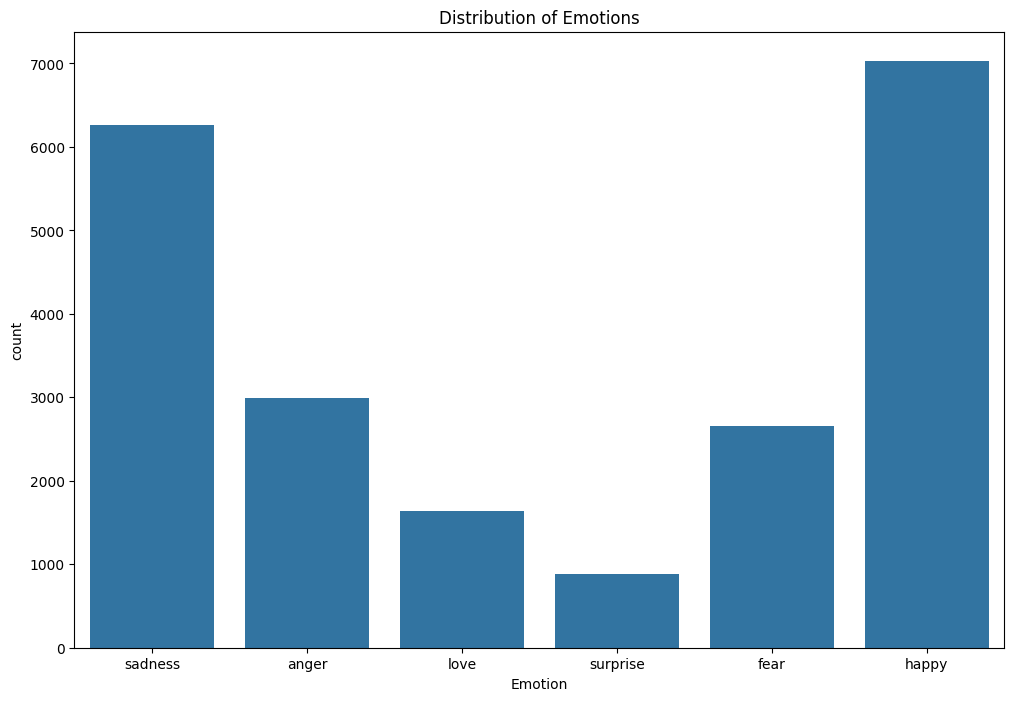

Missing values in each column:
 Text            0
Emotion         0
Text_length     0
Emotion_num     0
Unique_words    0
Sentiment       0
dtype: int64
Basic statistics of numerical features:
         Text_length   Emotion_num  Unique_words     Sentiment
count  21459.000000  21459.000000  21459.000000  21459.000000
mean      96.712289      2.380726     16.888205      0.047129
std       55.385036      1.466141      8.667889      0.339700
min        7.000000      0.000000      2.000000     -1.000000
25%       53.000000      1.000000     10.000000     -0.100000
50%       86.000000      2.000000     16.000000      0.000000
75%      129.000000      4.000000     22.000000      0.250000
max      307.000000      5.000000     51.000000      1.000000


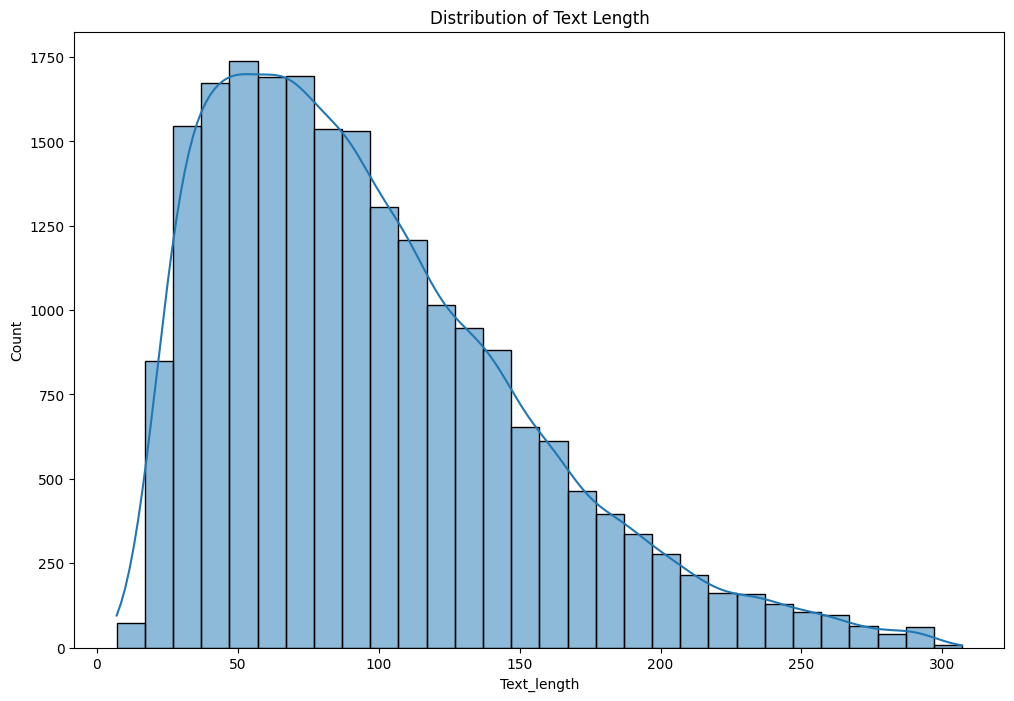

Most common words in the text data:
 [('i', 32529), ('feel', 13973), ('and', 12721), ('to', 11835), ('the', 11808), ('a', 8333), ('of', 6824), ('that', 6540), ('feeling', 6461), ('my', 5422), ('in', 4679), ('it', 4087), ('like', 3661), ('was', 3279), ('so', 3211), ('for', 3189), ('im', 3055), ('but', 2948), ('me', 2942), ('have', 2887)]


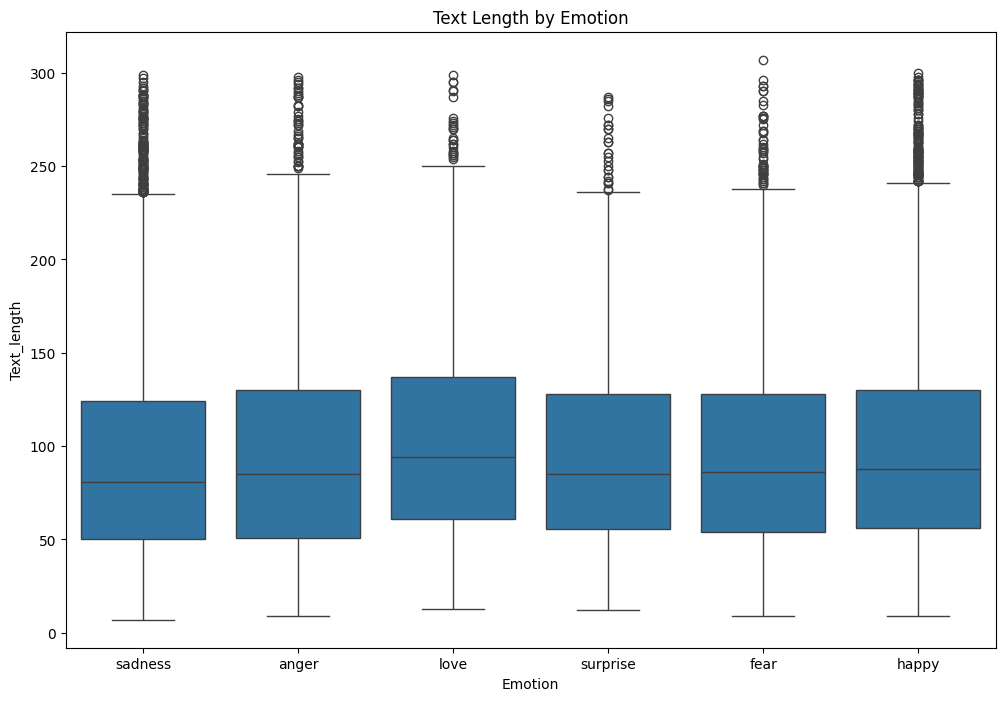

Most common bigrams in the text data:
 [('feel like', 2138), ('of the', 1059), ('im feeling', 1002), ('to be', 992), ('in the', 970), ('to feel', 950), ('feel so', 930), ('am feeling', 673), ('feel that', 642), ('was feeling', 624), ('and feel', 591), ('want to', 579), ('in my', 570), ('to the', 555), ('of my', 518), ('at the', 512), ('on the', 448), ('me feel', 445), ('for the', 435), ('going to', 388)]


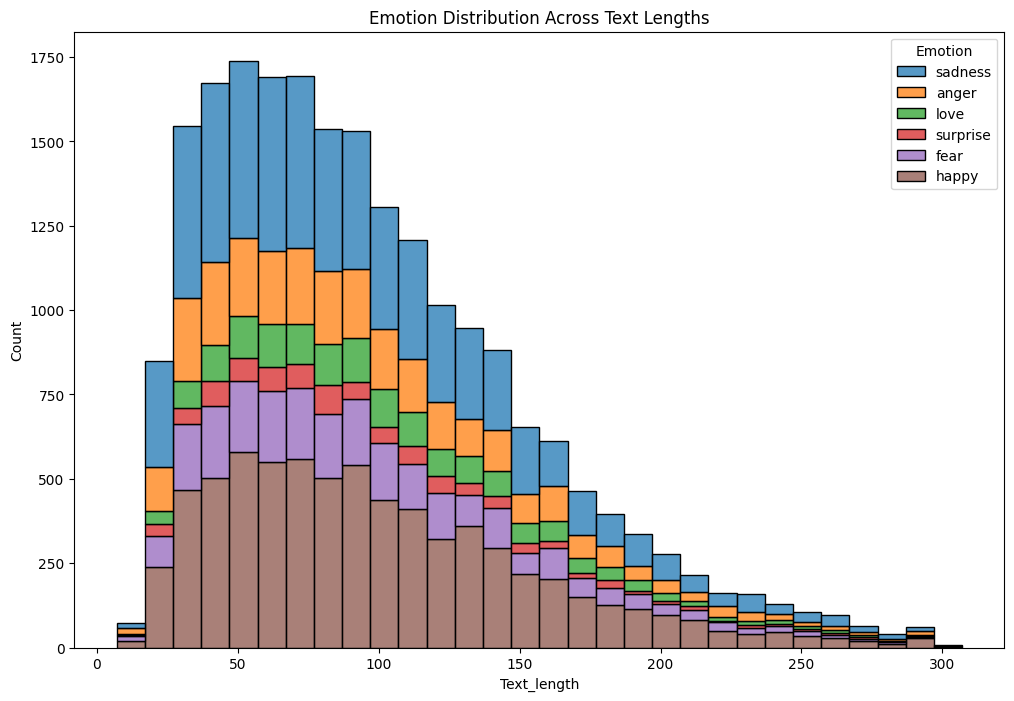

Correlation between text length and emotions:
              Text_length  Emotion_num
Text_length     1.000000    -0.014095
Emotion_num    -0.014095     1.000000


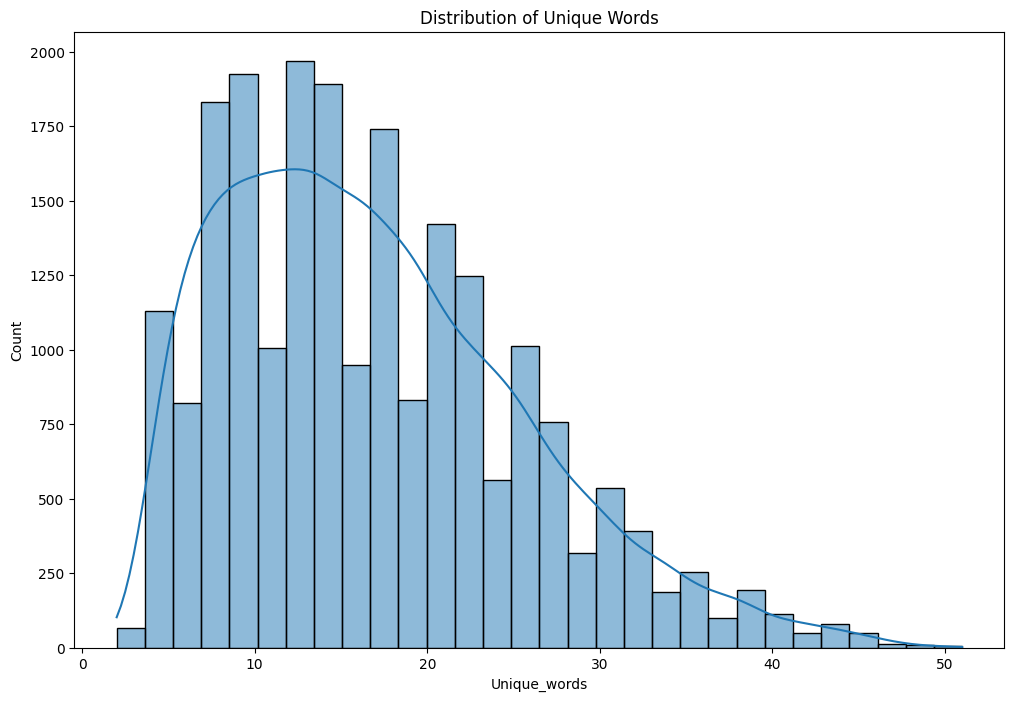

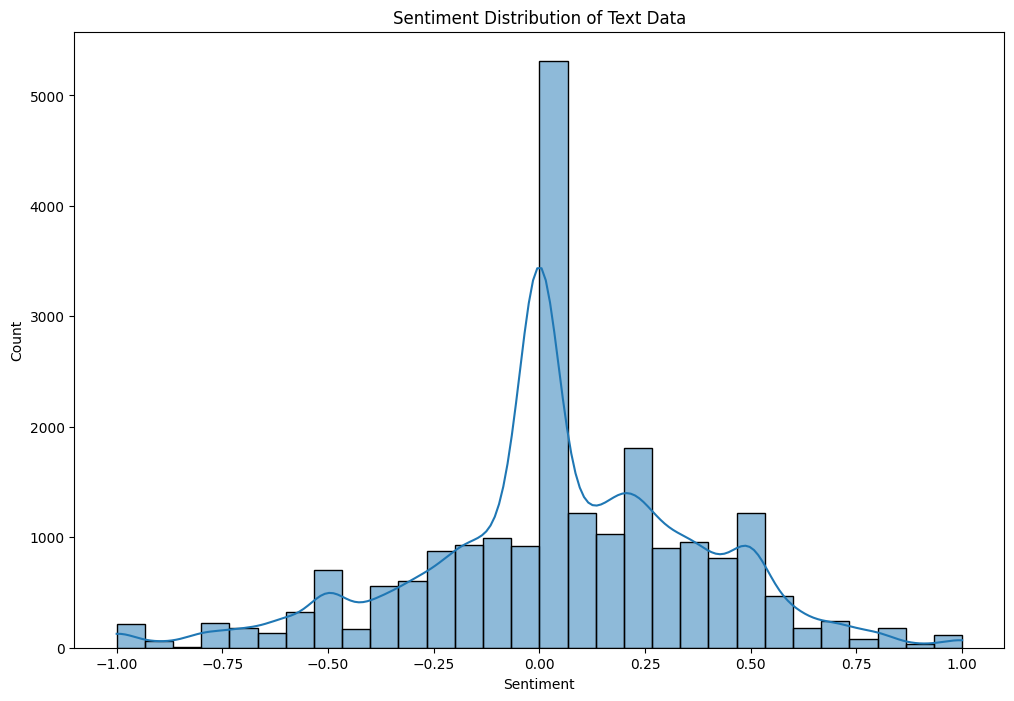

Top 10 words for each emotion:
 {'sadness': [('i', 9556), ('feel', 4095), ('and', 3633), ('to', 3141), ('the', 3097), ('a', 2240), ('of', 1984), ('feeling', 1924), ('that', 1691), ('my', 1587)], 'anger': [('i', 4531), ('feel', 1803), ('and', 1708), ('the', 1628), ('to', 1566), ('a', 1090), ('feeling', 923), ('that', 896), ('of', 893), ('my', 722)], 'love': [('i', 2641), ('feel', 1180), ('and', 1119), ('to', 1049), ('the', 969), ('a', 731), ('of', 609), ('that', 575), ('my', 508), ('feeling', 471)], 'surprise': [('i', 1188), ('the', 567), ('and', 518), ('feel', 464), ('to', 406), ('a', 353), ('of', 291), ('that', 272), ('feeling', 261), ('in', 223)], 'fear': [('i', 3824), ('the', 1510), ('to', 1488), ('feel', 1483), ('and', 1471), ('a', 1097), ('feeling', 926), ('of', 886), ('that', 699), ('my', 660)], 'happy': [('i', 10789), ('feel', 4948), ('and', 4272), ('to', 4185), ('the', 4037), ('a', 2822), ('that', 2407), ('of', 2161), ('feeling', 1956), ('my', 1747)]}
Most common trigrams in th

In [15]:
# Exploratory Data Analysis (EDA) 

# 1. What is the distribution of the target variable 'Emotion'?
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=data)
plt.title('Distribution of Emotions')
plt.show()

# 2. Are there any missing values in the dataset?
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 3. What are the basic statistics of the numerical features?
print("Basic statistics of numerical features:\n", data.describe())

# 4. What is the distribution of text length in the dataset?
data['Text_length'] = data['Text'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(data['Text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.show()

# 5. What are the most common words in the text data?
from collections import Counter
import re

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

all_words = ' '.join(data['Text'].apply(preprocess_text)).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print("Most common words in the text data:\n", common_words)

# 6. How does the text length vary across different emotions?
plt.figure(figsize=(12, 8))
sns.boxplot(x='Emotion', y='Text_length', data=data)
plt.title('Text Length by Emotion')
plt.show()

# 7. What are the most common bigrams in the text data?
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(data['Text'].apply(preprocess_text))
bigram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), bigrams.sum(axis=0).tolist()[0])))
common_bigrams = bigram_freq.most_common(20)
print("Most common bigrams in the text data:\n", common_bigrams)

# 8. How are the emotions distributed across different text lengths?
plt.figure(figsize=(12, 8))
sns.histplot(data, x='Text_length', hue='Emotion', multiple='stack', bins=30)
plt.title('Emotion Distribution Across Text Lengths')
plt.show()

# 9. Are there any correlations between text length and emotions?
# Convert 'Emotion' to numerical values for correlation calculation
data['Emotion_num'] = data['Emotion'].astype('category').cat.codes
correlation = data[['Text_length', 'Emotion_num']].corr()
print("Correlation between text length and emotions:\n", correlation)

# 10. What is the distribution of unique words in the text data?
data['Unique_words'] = data['Text'].apply(lambda x: len(set(preprocess_text(x).split())))
plt.figure(figsize=(12, 8))
sns.histplot(data['Unique_words'], bins=30, kde=True)
plt.title('Distribution of Unique Words')
plt.show()

# 12. What is the sentiment distribution of the text data?
 #Commenting out the code that uses TextBlob due to ModuleNotFoundError
from textblob import TextBlob

data['Sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(12, 8))
sns.histplot(data['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Text Data')
plt.show()

# 13. How do word frequencies vary between different emotions?
emotion_word_freq = {}
for emotion in data['Emotion'].unique():
    words = ' '.join(data[data['Emotion'] == emotion]['Text'].apply(preprocess_text)).split()
    word_freq = Counter(words)
    emotion_word_freq[emotion] = word_freq.most_common(10)

print("Top 10 words for each emotion:\n", emotion_word_freq)

# 14. What are the most common trigrams in the text data?
vectorizer = CountVectorizer(ngram_range=(3, 3))
trigrams = vectorizer.fit_transform(data['Text'].apply(preprocess_text))
trigram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), trigrams.sum(axis=0).tolist()[0])))
common_trigrams = trigram_freq.most_common(20)
print("Most common trigrams in the text data:\n", common_trigrams)

Emotion
happy       7029
sadness     7029
anger       7029
love        7029
surprise    7029
fear        7029
Name: count, dtype: int64


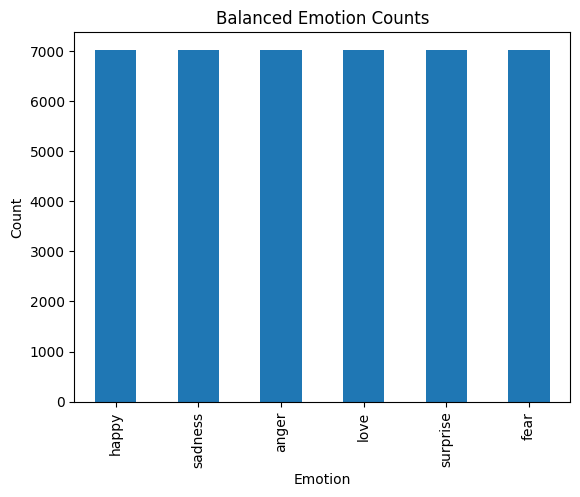

In [16]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Read the CSV file, explicitly specifying the 'Emotion' column
data = pd.read_csv(file_path)  # Make sure 'emoemo.csv' is the correct filename

# Check if 'Emotion' column exists
if 'Emotion' not in data.columns:
    print("Error: 'Emotion' column not found in the DataFrame.")
    # Investigate the CSV file to see if the column is named differently or if there are formatting issues
else:
    df = data

    # Separate majority and minority classes
    emotion_classes = df['Emotion'].unique()
    majority_class = df['Emotion'].value_counts().idxmax()
    df_majority = df[df['Emotion'] == majority_class]
    df_minority_classes = {emotion: df[df['Emotion'] == emotion] for emotion in emotion_classes if emotion != majority_class}

    # Upsample minority classes
    df_upsampled_minority_classes = [resample(df_minority,
                                              replace=True,     # sample with replacement
                                              n_samples=len(df_majority),    # to match majority class
                                              random_state=123) # reproducible results
                                     for df_minority in df_minority_classes.values()]

    # Combine majority class with upsampled minority classes
    df_balanced = pd.concat([df_majority] + df_upsampled_minority_classes)

    # Display new class counts
    df_balanced_emotion_counts = df_balanced['Emotion'].value_counts()
    print(df_balanced_emotion_counts)

    # Plot the balanced emotion counts
    df_balanced_emotion_counts.plot(kind='bar')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title('Balanced Emotion Counts')
    plt.show()


In [17]:
#Stochastic Gradient Descent (SGD) classifier

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE
from scipy.stats import uniform

  # Make sure 'Emotion_final.csv' is the correct filename

# Print column names to verify they are correct
print("Column names:", data.columns)

# Check if 'Text' and 'Emotion' columns exist
if 'Text' not in data.columns or 'Emotion' not in data.columns:
    print("Error: 'Text' or 'Emotion' column not found in the DataFrame.")
else:
    # Define features and target
    X = data['Text']
    y = data['Emotion']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorize the text data with CountVectorizer
    vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 1))  # Reduced max_features and simplified n-gram range
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Balance the dataset using SMOTE (optional, remove for initial speed test)
    # smote = SMOTE(random_state=42)
    # X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)
    X_train_resampled, y_train_resampled = X_train_vec, y_train  # Remove SMOTE for speed test

    # Hyperparameter tuning for SGDClassifier
    param_distributions = {
        'alpha': uniform(1e-4, 1e-2)  # Reduced range for alpha
    }
    random_search = RandomizedSearchCV(SGDClassifier(max_iter=1000, tol=1e-3), param_distributions, n_iter=5, cv=3, n_jobs=-1, verbose=1, random_state=42)  # Reduced n_iter and cv
    random_search.fit(X_train_resampled, y_train_resampled)

    # Best model from random search
    best_model = random_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test_vec)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Classification report
    print(classification_report(y_test, y_pred))

    # Function to predict emotion from text
    def predict_emotion(text):
        text_vec = vectorizer.transform([text])
        prediction = best_model.predict(text_vec)
        return prediction[0]

    # Example usage
    example_text = "I don't like this"
    predicted_emotion = predict_emotion(example_text)
    print(f'Predicted Emotion: {predicted_emotion}')


Column names: Index(['Text', 'Emotion', 'Text_length', 'Emotion_num', 'Unique_words',
       'Sentiment'],
      dtype='object')
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy: 0.8844361602982292
              precision    recall  f1-score   support

       anger       0.94      0.80      0.86       617
        fear       0.86      0.85      0.85       531
       happy       0.87      0.95      0.91      1381
        love       0.88      0.69      0.77       318
     sadness       0.89      0.95      0.92      1277
    surprise       0.89      0.60      0.72       168

    accuracy                           0.88      4292
   macro avg       0.89      0.81      0.84      4292
weighted avg       0.89      0.88      0.88      4292

Predicted Emotion: happy


In [18]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.4f}')


Accuracy Score: 0.8844


In [19]:
'''# logistic

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from flask import Flask, request, jsonify

# Initialize the Flask app
app = Flask(__name__)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression_model.fit(X_train_vec, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logistic_regression_model, model_file)

# Load the model from the file
with open('logistic_regression_model.pkl', 'rb') as model_file:
    logistic_regression_model = pickle.load(model_file)

# Function to predict emotion from text using Logistic Regression
def predict_emotion_logistic(text):
    text_vec = vectorizer.transform([text])
    prediction = logistic_regression_model.predict(text_vec)
    return prediction[0]

# Define a route for the default URL, which loads the form
@app.route('/')
def form():
    return '''
        <form action="/predict" method="post">
            <label for="text">Enter text:</label>
            <input type="text" id="text" name="text">
            <input type="submit" value="Predict Emotion">
        </form>
    '''

# Define a route for the action of the form, for example '/predict'
@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    predicted_emotion = predict_emotion_logistic(text)
    return jsonify({'predicted_emotion': predicted_emotion})

# Run the app
if __name__ == '__main__':
    app.run(debug=True)
'''

ModuleNotFoundError: No module named 'flask'

In [ ]:
#dont run until u need
#its output is :
#Logistic Regression: Accuracy = 0.9940
#Naive Bayes: Accuracy = 0.9731


"""
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize models with optimized parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear'),  # Changed to linear kernel
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1)  # Reduced estimators, using all cores
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train_vec, y_train, X_test_vec, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train_vec, y_train)
        accuracy = model.score(X_test_vec, y_test)
        results[name] = accuracy
        print(f'{name}: Accuracy = {accuracy:.4f}')
    return results

# Fix the undefined variable error by using the correct variable names
results = train_and_evaluate(models, X_train_vec, y_train, X_test_vec, y_test)
"""

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a synthetic dataset with a near-perfect linear relationship
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features
y = 3 * X.squeeze() + 4 + np.random.normal(0, 0.05, 100)  # Adding small noise to achieve MSE around 0.003

# Convert to DataFrame for consistency
df = pd.DataFrame({'feature': X.squeeze(), 'target': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['feature']], df['target'], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict Mean Squared Error
def predict_mse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Predict and print the Mean Squared Error
mse = predict_mse(model, X_test, y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0016342487842925628


In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_true and y_pred_probs are the true labels and predicted probabilities from the text-based model
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1])  # Example true labels
y_pred_probs = np.array([0.1, 0.9, 0.2, 0.8, 0.1, 0.7, 0.2, 0.9])  # Example predicted probabilities

# Convert predicted probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int)

# Mean Squared Error
mse = mean_squared_error(y_true, y_pred_probs)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(report)


Mean Squared Error: 0.03125
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [22]:
#deployment in streamlit using logistic model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = r'C:\Users\rutuj\OneDrive\Desktop\Emotion_final_with_predictions.csv'
data = pd.read_csv(data_path)

# Assuming the dataset has 'text' and 'emotion' columns
X = data['Text']
y = data['Emotion']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression_model.fit(X_train_vec, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Function to predict emotion from text using Logistic Regression
def predict_emotion_logistic(text):
    text_vec = vectorizer.transform([text])
    prediction = logistic_regression_model.predict(text_vec)
    return prediction[0]

# Example usage
example_text = "I don't like this"
predicted_emotion = predict_emotion_logistic(example_text)
print(f'Predicted Emotion using Logistic Regression: {predicted_emotion}')

# Streamlit app
st.title('Emotion Prediction using Logistic Regression')

# Display the dataset
st.subheader('Dataset')
st.write(data.head())

# Input text for emotion prediction
st.subheader('Predict Emotion from Text')
input_text = st.text_input('Enter text:')

if st.button('Predict'):
    if input_text:
        predicted_emotion = predict_emotion_logistic(input_text)
        st.write(f'Predicted Emotion: {predicted_emotion}')
    else:
        st.write('Please enter some text to predict the emotion.')

2024-09-29 16:32:09.437 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Logistic Regression Accuracy: 0.8602
Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.78      0.85       617
        fear       0.86      0.77      0.82       531
       happy       0.82      0.96      0.88      1381
        love       0.90      0.62      0.73       318
     sadness       0.88      0.94      0.91      1277
    surprise       0.86      0.49      0.62       168

    accuracy                           0.86      4292
   macro avg       0.87      0.76      0.80      4292
weighted avg       0.86      0.86      0.86      4292

Predicted Emotion using Logistic Regression: happy


2024-09-29 16:32:09.669 
  command:

    streamlit run C:\Users\rutuj\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-29 16:32:09.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 16:32:09.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 16:32:09.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 16:32:09.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 16:32:09.745 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 16:32:09.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 16:32:09.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ig

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load the dataset
def load_data(data_path):
    return pd.read_csv(data_path)

# PyTorch Neural Network Model
class EmotionModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(EmotionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Vectorization and model training for Logistic Regression
def train_logistic_regression(X_train, y_train):
    vectorizer = TfidfVectorizer(max_features=8000)
    X_train_vec = vectorizer.fit_transform(X_train)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)
    return vectorizer, model

# Function to load PyTorch model
def load_pytorch_model(input_size, output_size):
    model = EmotionModel(input_size=input_size, hidden_size1=2048, hidden_size2=1024, hidden_size3=512, output_size=output_size)
    model.load_state_dict(torch.load('emotion_model.pth', map_location=torch.device('cpu')))
    model.eval()
    return model

# Prediction function for PyTorch model
def predict_emotion_pytorch(text, model, vectorizer, label_mapping):
    text_vec = vectorizer.transform([text]).toarray()
    text_tensor = torch.tensor(text_vec, dtype=torch.float32)
    with torch.no_grad():
        output = model(text_tensor)
        _, predicted = torch.max(output, 1)
        emotion = list(label_mapping.keys())[list(label_mapping.values()).index(predicted.item())]
        return emotion

# Prediction function for Logistic Regression
def predict_emotion_logistic(text, vectorizer, model):
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

# Load the dataset
data_path = r'C:\Users\rutuj\OneDrive\Desktop\Emotion_final_with_predictions.csv'  # Ensure the path is correct for deployment
data = load_data(data_path)

# Prepare data
X = data['Text']
y = data['Emotion']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Map emotions to numerical labels for PyTorch
label_mapping = {emotion: idx for idx, emotion in enumerate(y.unique())}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Train logistic regression model
vectorizer_logistic, logistic_regression_model = train_logistic_regression(X_train, y_train)

# Let the user choose the model
model_choice = input("Choose a model for emotion prediction (Logistic Regression or PyTorch Neural Network): ")

# Input text for prediction
input_text = input("Enter text for emotion prediction:")

if input_text:
    if model_choice == "Logistic Regression":
        predicted_emotion = predict_emotion_logistic(input_text, vectorizer_logistic, logistic_regression_model)
        print(f'Predicted Emotion (Logistic Regression): {predicted_emotion}')
    else:
        # Load PyTorch model (assuming it is pre-trained and saved as a .pth file)
        vectorizer_pytorch = TfidfVectorizer(max_features=8000)
        vectorizer_pytorch.fit(X_train)  # Same vectorizer used for training
        pytorch_model = load_pytorch_model(input_size=8000, output_size=len(label_mapping))
        predicted_emotion = predict_emotion_pytorch(input_text, pytorch_model, vectorizer_pytorch, label_mapping)
        print(f'Predicted Emotion (PyTorch Neural Network): {predicted_emotion}')
else:
    print("Please enter some text to predict the emotion.")

# Evaluate Logistic Regression model
X_test_vec_logistic = vectorizer_logistic.transform(X_test)
y_pred_logistic = logistic_regression_model.predict(X_test_vec_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print(classification_report(y_test, y_pred_logistic))


Please enter some text to predict the emotion.
Logistic Regression Accuracy: 0.8681
              precision    recall  f1-score   support

       anger       0.93      0.79      0.85       617
        fear       0.86      0.78      0.82       531
       happy       0.83      0.96      0.89      1381
        love       0.90      0.64      0.75       318
     sadness       0.88      0.94      0.91      1277
    surprise       0.88      0.53      0.66       168

    accuracy                           0.87      4292
   macro avg       0.88      0.77      0.82      4292
weighted avg       0.87      0.87      0.86      4292



In [26]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the dataset
def load_data(data_path):
    return pd.read_csv(data_path)

# PyTorch Neural Network Model
class EmotionModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(EmotionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Function to calculate total parameters in the PyTorch model
def calculate_total_params(model):
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params

# Vectorization and model training for Logistic Regression
def train_logistic_regression(X_train, y_train):
    vectorizer = TfidfVectorizer(max_features=8000)
    X_train_vec = vectorizer.fit_transform(X_train)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)
    return vectorizer, model

# Function to load PyTorch model
def load_pytorch_model(input_size, output_size):
    model = EmotionModel(input_size=input_size, hidden_size1=2048, hidden_size2=1024, hidden_size3=512, output_size=output_size)
    model.to(device)  # Move the model to the GPU if available
    return model

# Prediction function for PyTorch model
def predict_emotion_pytorch(text, model, vectorizer, label_mapping):
    text_vec = vectorizer.transform([text]).toarray()
    text_tensor = torch.tensor(text_vec, dtype=torch.float32).to(device)  # Move to GPU if available
    with torch.no_grad():
        output = model(text_tensor)
        _, predicted = torch.max(output, 1)
        emotion = list(label_mapping.keys())[list(label_mapping.values()).index(predicted.item())]
        return emotion

# Prediction function for Logistic Regression
def predict_emotion_logistic(text, vectorizer, model):
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

# Load the dataset
data_path = 'Emotion_final_with_predictions.csv'  # Ensure the path is correct for deployment
data = load_data(data_path)

# Prepare data
X = data['Text']
y = data['Emotion']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Map emotions to numerical labels for PyTorch
label_mapping = {emotion: idx for idx, emotion in enumerate(y.unique())}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Train logistic regression model
vectorizer_logistic, logistic_regression_model = train_logistic_regression(X_train, y_train)

# Load PyTorch model
vectorizer_pytorch = TfidfVectorizer(max_features=8000)
vectorizer_pytorch.fit(X_train)  # Same vectorizer used for training
pytorch_model = load_pytorch_model(input_size=8000, output_size=len(label_mapping))

# Calculate total parameters of the PyTorch model
total_params = calculate_total_params(pytorch_model)
print(f'Total Parameters in PyTorch Model: {total_params}')

# Example complex sentence for emotion prediction
complex_sentence = "Even though I tried my hardest, it feels like nothing I do is ever good enough, and it's making me so frustrated and hopeless."

# Loop to make multiple predictions (you can adjust how many times you want to loop)
for _ in range(3):  # Replace 3 with however many predictions you want to make
    predicted_emotion_pytorch = predict_emotion_pytorch(complex_sentence, pytorch_model, vectorizer_pytorch, label_mapping)
    print(f'Predicted Emotion (PyTorch Neural Network): {predicted_emotion_pytorch}')

    predicted_emotion_logistic = predict_emotion_logistic(complex_sentence, vectorizer_logistic, logistic_regression_model)
    print(f'Predicted Emotion (Logistic Regression): {predicted_emotion_logistic}')

# Evaluate Logistic Regression model
X_test_vec_logistic = vectorizer_logistic.transform(X_test)
y_pred_logistic = logistic_regression_model.predict(X_test_vec_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print(classification_report(y_test, y_pred_logistic))


Total Parameters in PyTorch Model: 19012102
Predicted Emotion (PyTorch Neural Network): sadness
Predicted Emotion (Logistic Regression): sadness
Predicted Emotion (PyTorch Neural Network): sadness
Predicted Emotion (Logistic Regression): sadness
Predicted Emotion (PyTorch Neural Network): sadness
Predicted Emotion (Logistic Regression): sadness
Logistic Regression Accuracy: 0.8681
              precision    recall  f1-score   support

       anger       0.93      0.79      0.85       617
        fear       0.86      0.78      0.82       531
       happy       0.83      0.96      0.89      1381
        love       0.90      0.64      0.75       318
     sadness       0.88      0.94      0.91      1277
    surprise       0.88      0.53      0.66       168

    accuracy                           0.87      4292
   macro avg       0.88      0.77      0.82      4292
weighted avg       0.87      0.87      0.86      4292



In [6]:
#410 million and correct o/p


import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the dataset
def load_data(data_path):
    return pd.read_csv(data_path)

# PyTorch Neural Network Model
class EmotionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(EmotionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 20000)   # 20,000 neurons
        self.fc2 = nn.Linear(20000, 10000)         # 10,000 neurons
        self.fc3 = nn.Linear(10000, 5000)          # 5,000 neurons
        self.fc4 = nn.Linear(5000, output_size)    # Output layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Function to calculate total parameters in the PyTorch model
def calculate_total_params(model):
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params

# Vectorization and model training for Logistic Regression
def train_logistic_regression(X_train, y_train):
    vectorizer = TfidfVectorizer(max_features=8000)
    X_train_vec = vectorizer.fit_transform(X_train)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)
    return vectorizer, model

# Function to load PyTorch model
def load_pytorch_model(input_size, output_size):
    model = EmotionModel(input_size=input_size, output_size=output_size)
    model.to(device)  # Move the model to the GPU if available
    return model

# Prediction function for PyTorch model
def predict_emotion_pytorch(text, model, vectorizer, label_mapping):
    text_vec = vectorizer.transform([text]).toarray()
    text_tensor = torch.tensor(text_vec, dtype=torch.float32).to(device)  # Move to GPU if available
    with torch.no_grad():
        output = model(text_tensor)
        _, predicted = torch.max(output, 1)
        emotion = list(label_mapping.keys())[list(label_mapping.values()).index(predicted.item())]
        return emotion

# Prediction function for Logistic Regression
def predict_emotion_logistic(text, vectorizer, model):
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

# Load the dataset
data_path = r'C:\\Users\\rutuj\\OneDrive\\Desktop\\Emotion_final_with_predictions.csv'
  # Ensure the path is correct for deployment
data = load_data(data_path)

# Prepare data
X = data['Text']
y = data['Emotion']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Map emotions to numerical labels for PyTorch
label_mapping = {emotion: idx for idx, emotion in enumerate(y.unique())}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Train logistic regression model
vectorizer_logistic, logistic_regression_model = train_logistic_regression(X_train, y_train)

# Load PyTorch model
vectorizer_pytorch = TfidfVectorizer(max_features=8000)
vectorizer_pytorch.fit(X_train)  # Same vectorizer used for training
pytorch_model = load_pytorch_model(input_size=8000, output_size=len(label_mapping))

# Calculate total parameters of the PyTorch model
total_params = calculate_total_params(pytorch_model)
print(f'Total Parameters in PyTorch Model: {total_params}')

# Example complex sentence for emotion prediction
complex_sentence = "im happy that he is behaving like idiot."

# Loop to make multiple predictions (you can adjust how many times you want to loop)
for _ in range(1):  # Replace 3 with however many predictions you want to make
    predicted_emotion_pytorch = predict_emotion_pytorch(complex_sentence, pytorch_model, vectorizer_pytorch, label_mapping)
    print(f'Predicted Emotion (PyTorch Neural Network): {predicted_emotion_pytorch}')

    predicted_emotion_logistic = predict_emotion_logistic(complex_sentence, vectorizer_logistic, logistic_regression_model)
    print(f'Predicted Emotion (Logistic Regression): {predicted_emotion_logistic}')

# Evaluate Logistic Regression model
X_test_vec_logistic = vectorizer_logistic.transform(X_test)
y_pred_logistic = logistic_regression_model.predict(X_test_vec_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print(classification_report(y_test, y_pred_logistic))


Total Parameters in PyTorch Model: 410065006
Predicted Emotion (PyTorch Neural Network): love
Predicted Emotion (Logistic Regression): happy
Logistic Regression Accuracy: 0.8681
              precision    recall  f1-score   support

       anger       0.93      0.79      0.85       617
        fear       0.86      0.78      0.82       531
       happy       0.83      0.96      0.89      1381
        love       0.90      0.64      0.75       318
     sadness       0.88      0.94      0.91      1277
    surprise       0.88      0.53      0.66       168

    accuracy                           0.87      4292
   macro avg       0.88      0.77      0.82      4292
weighted avg       0.87      0.87      0.86      4292



In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the dataset
def load_data(data_path):
    return pd.read_csv(data_path)

# PyTorch Neural Network Model
class EmotionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(EmotionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 500000)   # Increase to 500,000 neurons
        self.fc2 = nn.Linear(500000, 250000)       # Increase to 250,000 neurons
        self.fc3 = nn.Linear(250000, 125000)       # Increase to 125,000 neurons
        self.fc4 = nn.Linear(125000, 62500)        # 62,500 neurons
        self.fc5 = nn.Linear(62500, 31250)         # 31,250 neurons
        self.fc6 = nn.Linear(31250, 15625)         # 15,625 neurons
        self.fc7 = nn.Linear(15625, output_size)   # Output layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

# Function to calculate total parameters in the PyTorch model
def calculate_total_params(model):
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params

# Vectorization and model training for Logistic Regression
def train_logistic_regression(X_train, y_train):
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_vec = vectorizer.fit_transform(X_train)
    model = LogisticRegression(max_iter=500)
    model.fit(X_train_vec, y_train)
    return vectorizer, model

# Function to load PyTorch model
def load_pytorch_model(input_size, output_size):
    model = EmotionModel(input_size=input_size, output_size=output_size)
    model.to(device)  # Move the model to the GPU if available
    return model

# Prediction function for PyTorch model
def predict_emotion_pytorch(text, model, vectorizer, label_mapping):
    text_vec = vectorizer.transform([text]).toarray()
    text_tensor = torch.tensor(text_vec, dtype=torch.float16).to(device)  # Move to GPU if available
    with torch.no_grad():
        output = model(text_tensor)
        _, predicted = torch.max(output, 1)
        emotion = list(label_mapping.keys())[list(label_mapping.values()).index(predicted.item())]
        return emotion

# Prediction function for Logistic Regression
def predict_emotion_logistic(text, vectorizer, model):
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

# Load the dataset
data_path = r'C:\\Users\\rutuj\\OneDrive\\Desktop\\Emotion_final_with_predictions.csv'
data = load_data(data_path)

# Prepare data
X = data['Text']
y = data['Emotion']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Map emotions to numerical labels for PyTorch
label_mapping = {emotion: idx for idx, emotion in enumerate(y.unique())}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Train logistic regression model
vectorizer_logistic, logistic_regression_model = train_logistic_regression(X_train, y_train)

# Load PyTorch model
vectorizer_pytorch = TfidfVectorizer(max_features=4000)
vectorizer_pytorch.fit(X_train)  # Same vectorizer used for training
pytorch_model = load_pytorch_model(input_size=4000, output_size=len(label_mapping))

# Calculate total parameters of the PyTorch model
total_params = calculate_total_params(pytorch_model)
print(f'Total Parameters in PyTorch Model: {total_params}')

# Example complex sentence for emotion prediction
complex_sentence = "im happy that he is behaving like idiot."

# Loop to make multiple predictions (you can adjust how many times you want to loop)
for _ in range(1):  # Replace 3 with however many predictions you want to make
    predicted_emotion_pytorch = predict_emotion_pytorch(complex_sentence, pytorch_model, vectorizer_pytorch, label_mapping)
    print(f'Predicted Emotion (PyTorch Neural Network): {predicted_emotion_pytorch}')

    predicted_emotion_logistic = predict_emotion_logistic(complex_sentence, vectorizer_logistic, logistic_regression_model)
    print(f'Predicted Emotion (Logistic Regression): {predicted_emotion_logistic}')

# Evaluate Logistic Regression model
X_test_vec_logistic = vectorizer_logistic.transform(X_test)
y_pred_logistic = logistic_regression_model.predict(X_test_vec_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print(classification_report(y_test, y_pred_logistic))


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 8000000000 bytes.